# Hw3
### Data Exploration

---



---



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
path = r'/content/gdrive/My Drive/Colab_Datasets'
os.chdir(path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip3 install torch===1.3.1 torchvision===0.4.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install git+https://github.com/maciejkula/spotlight.git@master#egg=spotlight

In [ ]:
import gzip
import json

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('DigitalMusic.csv')
df.head()

,overall,asin,title,brand,also_buy,reviewerID,reviewerName,reviewText
0,5.0,0001377647,Master Collection Volume One,John Michael Talbot,"['B000002UEN', 'B000008LD5', 'B01J804JKE', '74...",A1UNS26W21A9C2,RMMP,"If you're looking for a meditative, contemplat..."
1,5.0,0001377647,Master Collection Volume One,John Michael Talbot,"['B000002UEN', 'B000008LD5', 'B01J804JKE', '74...",AWQEC86BVMVFR,Dino Benedet,I have fallen in love with John Michael Talbot...
2,5.0,0001377647,Master Collection Volume One,John Michael Talbot,"['B000002UEN', 'B000008LD5', 'B01J804JKE', '74...",A21OOZLUPQ54TP,Joseph Koheleth,This was the first album I ever listened to by...
3,5.0,0001377647,Master Collection Volume One,John Michael Talbot,"['B000002UEN', 'B000008LD5', 'B01J804JKE', '74...",A1DQ8DBAGVUK6O,Eleanore K. Wasson,Excellent CD of John Michael Talbot!!! Bought ...
4,5.0,0001377647,Master Collection Volume One,John Michael Talbot,"['B000002UEN', 'B000008LD5', 'B01J804JKE', '74...",A282OUUS7CG31A,Theresa Degezelle,one of John Michael Talbot's best works. Liste...


In [ ]:
# Ratings
# cnt   = ~1.6mm ratings
# avg   = ~3.6 +/- 1.6
# Products
# cntd  = ~460,000 products
# avg   = ~20 +/- 140 ratings per product
#       = ~3.3 +/- 1.3 ratings per user
# Users
# cntd  = ~840,000 users
# avg   = ~1 +/- 1 ratings per user
#       = ~3.5 +/- 1.6 ratings per product

In [ ]:
# df.describe()
# df['SoftwareID'].nunique()
# df['UserID'].nunique()
# df[['SoftwareID', 'Rating']].groupby(['SoftwareID']).agg(['count','mean']).mean()
# df[['SoftwareID', 'Rating']].groupby(['SoftwareID']).agg(['count','mean']).std()
# df[['UserID', 'Rating']].groupby(['UserID']).agg(['count','mean']).mean()
# df[['UserID', 'Rating']].groupby(['UserID']).agg(['count','mean']).std()

In [ ]:
print(df.columns.values.tolist())

['overall', 'asin', 'title', 'brand', 'also_buy', 'reviewerID', 'reviewerName', 'reviewText']


In [ ]:
df['asin'].nunique()

456992

In [ ]:
df['asin'].count()

1602606

In [ ]:
df['reviewerID'].nunique()

840372

In [ ]:
ratings = pd.DataFrame(df.groupby('asin')['overall'].mean())
ratings.head()
ratings['number_of_ratings'] = df.groupby('asin')['overall'].count()
ratings.head()

,overall,number_of_ratings
asin,,
0001377647,5.000000,39
0001388703,4.571429,28
0001526146,4.891304,46
0001527134,4.878788,33
0001529145,5.000000,4


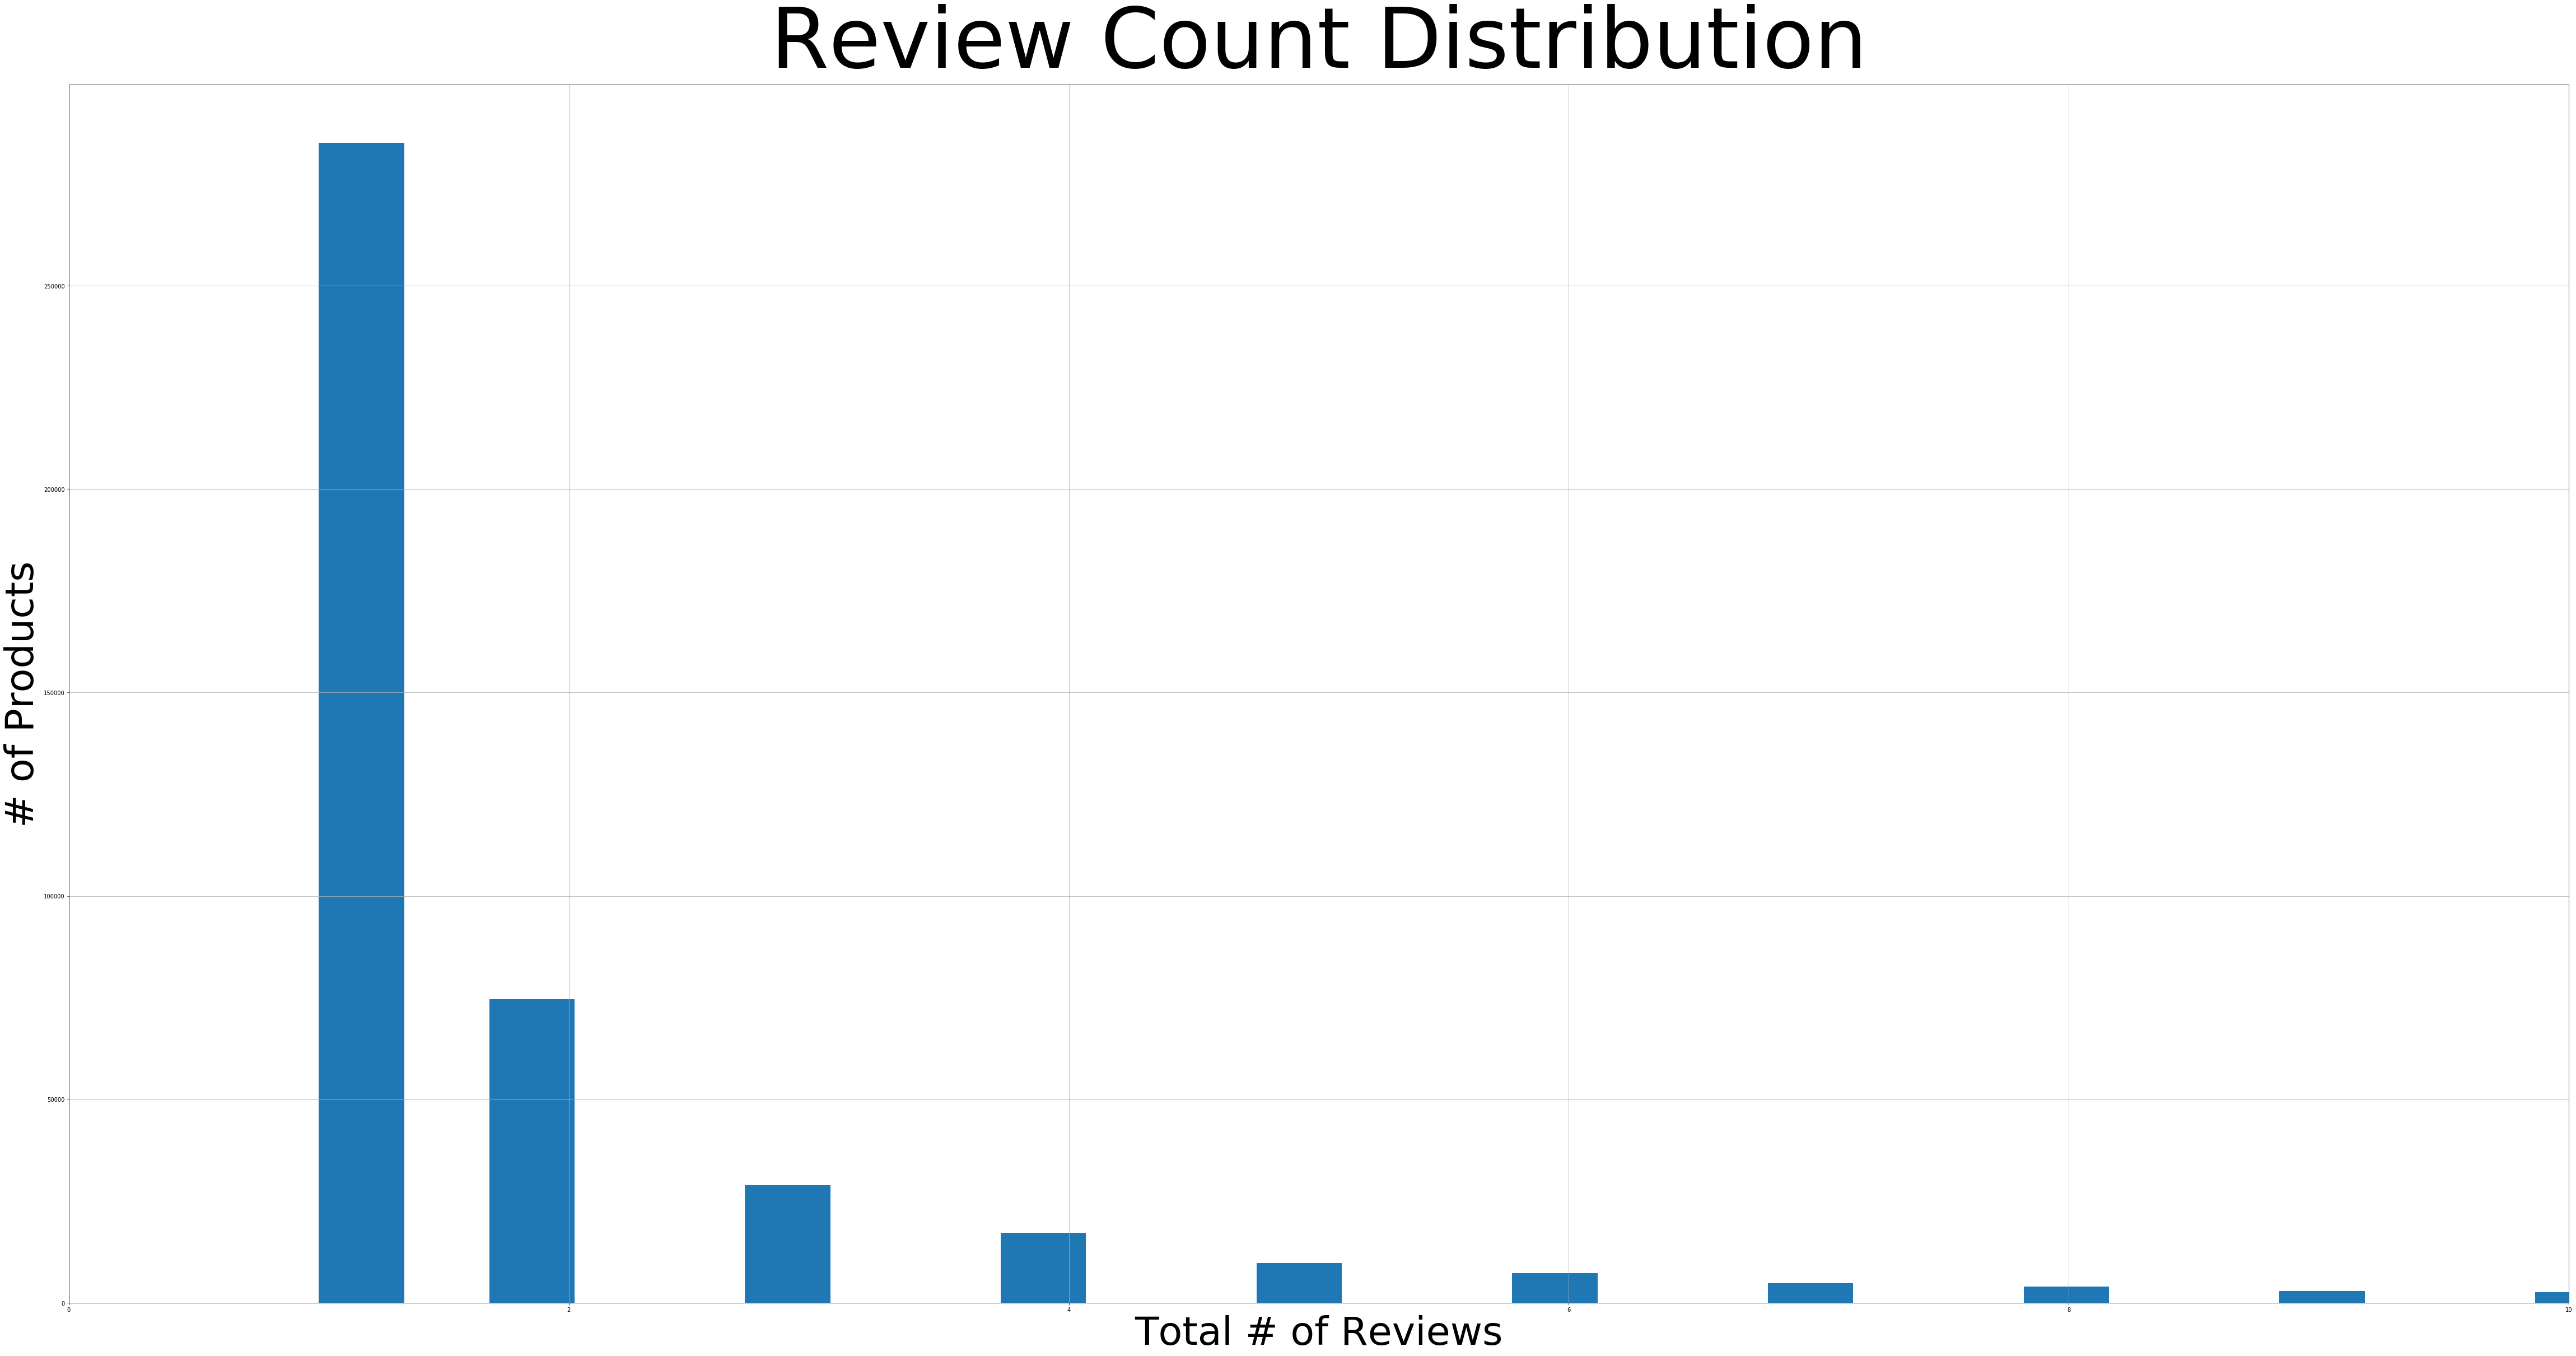

In [ ]:

plt.figure(figsize=[80,40])

ratings['number_of_ratings'].hist(bins=10000)
plt.xlim(xmin=0, xmax = 10)
plt.title('Review Count Distribution',fontsize=150)
plt.xlabel('Total # of Reviews',fontsize=70)
plt.ylabel('# of Products',fontsize=70)
plt.show()

In [ ]:
# Joint Plot
fontsize = 10

fig, axes = plt.subplots()
fig, axes = plt.subplots(figsize=(20,10))

sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

axes.set_title('User Ratings Distribution Plot', fontsize=50)

axes.yaxis.grid(True)
axes.set_xlabel('Ratings',fontsize=25)
axes.set_ylabel('Count',fontsize=25)

plt.show();


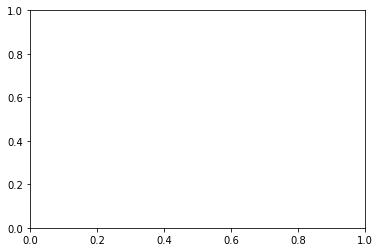

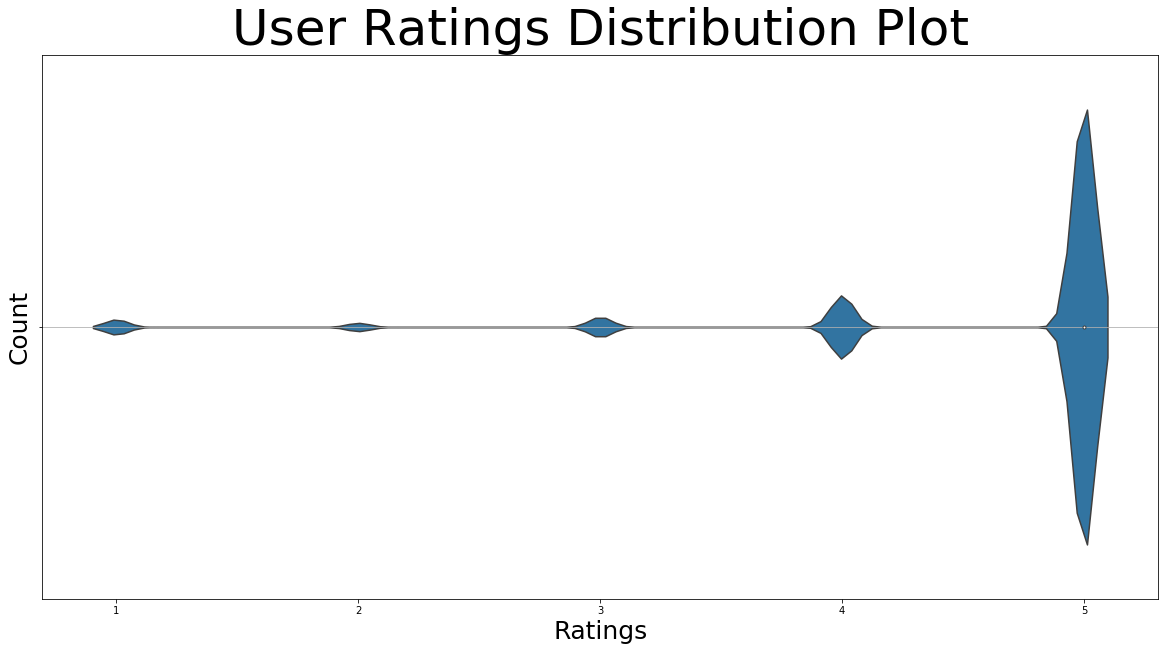

In [ ]:
# Violin Plots
fontsize = 10

fig, axes = plt.subplots()
fig, axes = plt.subplots(figsize=(20,10))

axes= sns.violinplot(dataset = df,
                     x = df['overall'], 
                     scale = "width")

axes.set_title('User Ratings Distribution Plot', fontsize=50)

axes.yaxis.grid(True)
axes.set_xlabel('Ratings',fontsize=25)
axes.set_ylabel('Count',fontsize=25)

plt.show();